<a href="https://www.kaggle.com/code/egyfirst/beauty-of-propagation-part3?scriptVersionId=127741674" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![cluster propagation](https://raw.githubusercontent.com/egy1st/denmune-clustering-algorithm/main/images/propagation.gif)

##### Have you ever wondered how a cluster propgate. It is time to reveal the beuty of clusters propgation. It as simple as
- running the following cells,
- wait,
- watch and
- ENJOY.

In [1]:
import pandas as pd
import time
import os.path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# install DenMune clustering algorithm using pip from https://pypi.org/project/denmune/
!pip install denmune
# now import it
from denmune import DenMune

     |████████████████████████████████| 9.2 MB 10.0 MB/s            
     |████████████████████████████████| 41 kB 382 kB/s             


In [3]:
# clone datasets from our repository datasets
if not os.path.exists('datasets'):
  !git clone https://github.com/egy1st/datasets
    
data_path = 'datasets/denmune/chameleon/'  
datasets = ["t7.10k", "t4.8k", "t5.8k", "t8.8k"]    

Cloning into 'datasets'...
remote: Enumerating objects: 68, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 68 (delta 12), reused 63 (delta 10), pack-reused 0
Unpacking objects: 100% (68/68), 20.59 MiB | 6.07 MiB/s, done.


In [4]:
#@title  { run: "auto", vertical-output: true, form-width: "50%" }
dataset = "t7.10k" #@param ["t4.8k", "t5.8k", "t7.10k", "t8.8k"]
show_noize_checkbox = True #@param {type:"boolean"}
data_path = 'datasets/denmune/chameleon/' 

# train file
data_file = data_path + dataset +'.csv'
X_train = pd.read_csv(data_file, sep=',', header=None)


itration 0


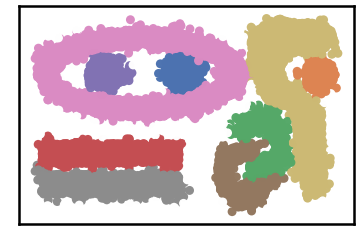

itration 2
Propagation at iteration: 2


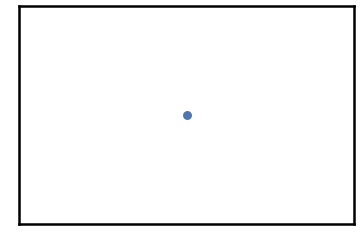

itration 3
Propagation at iteration: 3


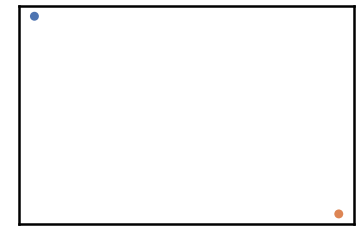

itration 4
Propagation at iteration: 4


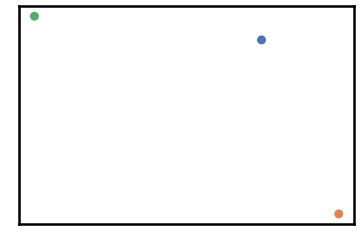

itration 5
Propagation at iteration: 5


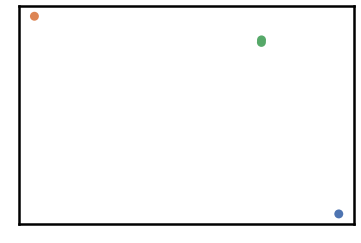

itration 10
Propagation at iteration: 10


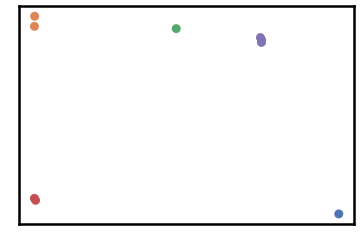

itration 15
Propagation at iteration: 15


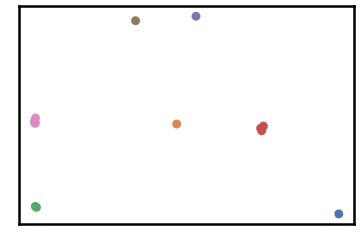

itration 20
Propagation at iteration: 20


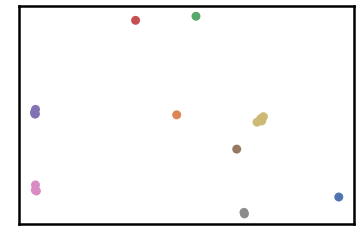

itration 25
Propagation at iteration: 25


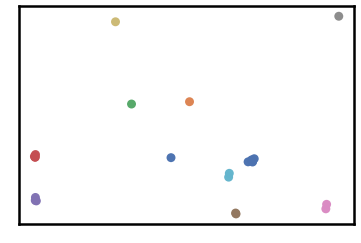

itration 30
Propagation at iteration: 30


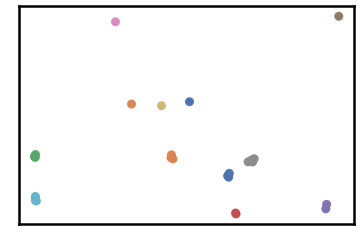

itration 35
Propagation at iteration: 35


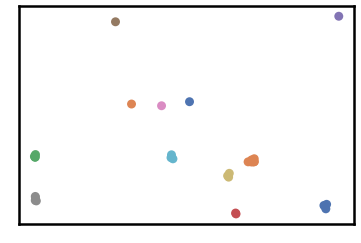

itration 40
Propagation at iteration: 40


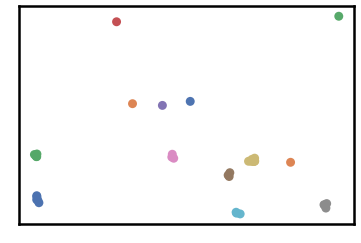

itration 45
Propagation at iteration: 45


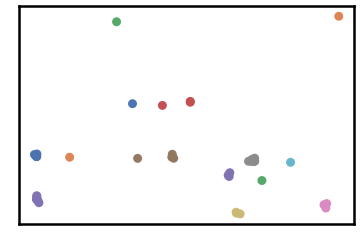

itration 50
Propagation at iteration: 50


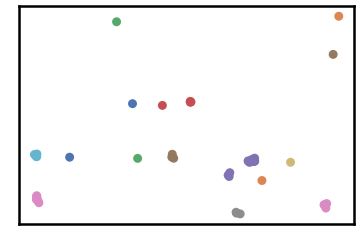

itration 60
Propagation at iteration: 60


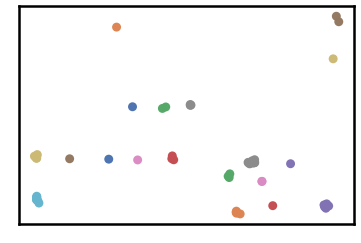

itration 70
Propagation at iteration: 70


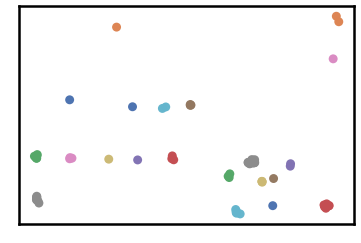

itration 80
Propagation at iteration: 80


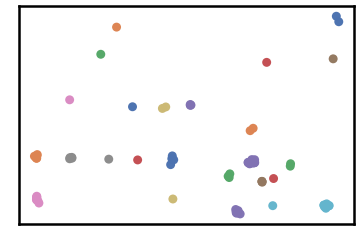

itration 90
Propagation at iteration: 90


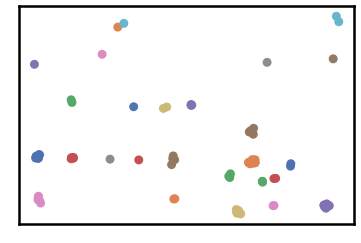

itration 100
Propagation at iteration: 100


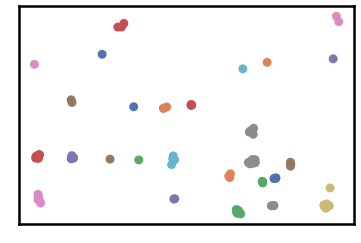

itration 150
Propagation at iteration: 150


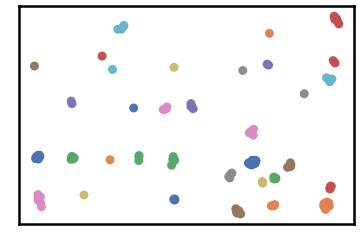

itration 200
Propagation at iteration: 200


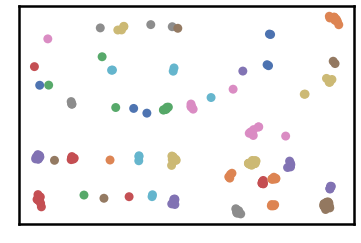

itration 250
Propagation at iteration: 250


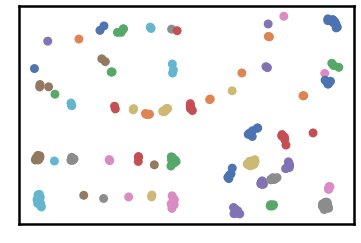

itration 300
Propagation at iteration: 300


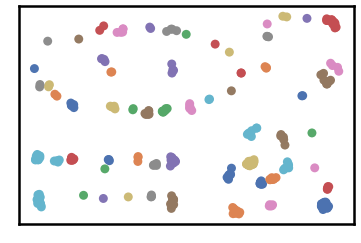

itration 350
Propagation at iteration: 350


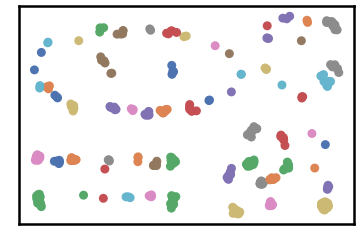

itration 400
Propagation at iteration: 400


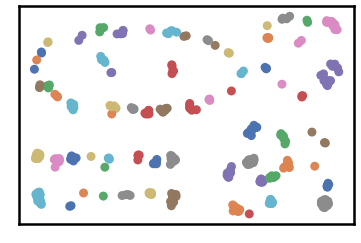

itration 450
Propagation at iteration: 450


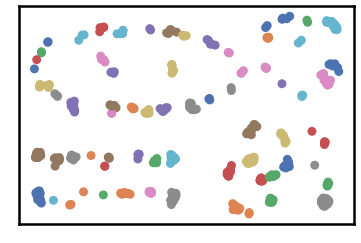

itration 500
Propagation at iteration: 500


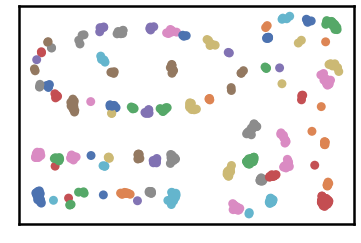

itration 600
Propagation at iteration: 600


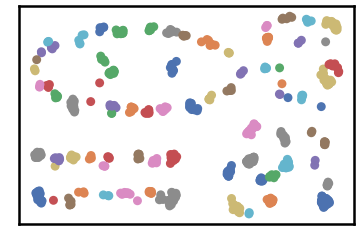

itration 700
Propagation at iteration: 700


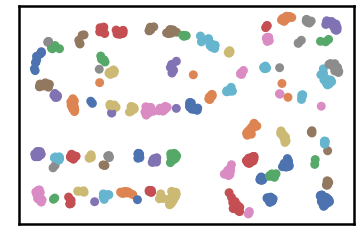

itration 800
Propagation at iteration: 800


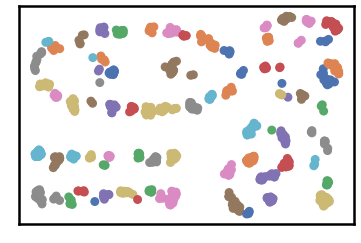

itration 900
Propagation at iteration: 900


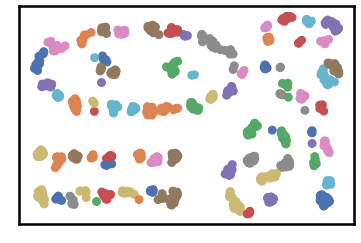

itration 1000
Propagation at iteration: 1000


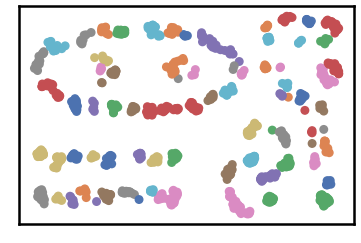

itration 1250
Propagation at iteration: 1250


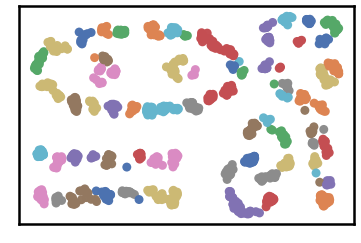

itration 1500
Propagation at iteration: 1500


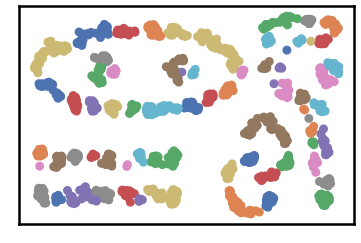

itration 1750
Propagation at iteration: 1750


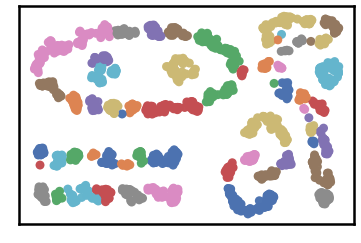

itration 2000
Propagation at iteration: 2000


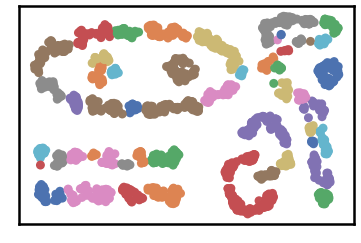

itration 2250
Propagation at iteration: 2250


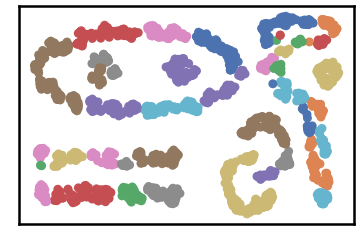

itration 2500
Propagation at iteration: 2500


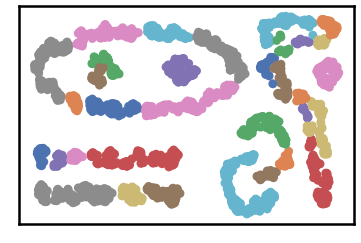

itration 2750
Propagation at iteration: 2750


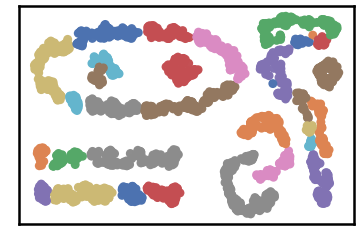

itration 3000
Propagation at iteration: 3000


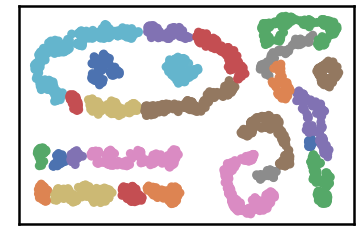

itration 3500
Propagation at iteration: 3500


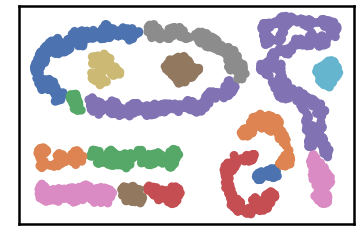

itration 4000
Propagation at iteration: 4000


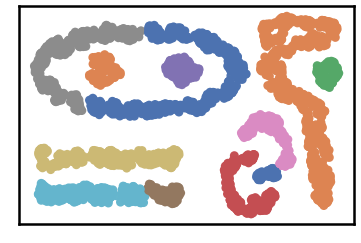

itration 4500
Propagation at iteration: 4500


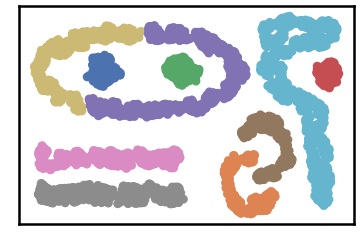

itration 5000
Propagation at iteration: 5000


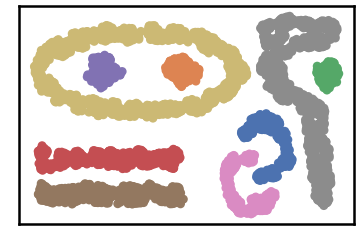

In [5]:
from itertools import chain

# Denmune's Paramaters
knn = 39 # number of k-nearest neighbor, the only parameter required by the algorithm

# create list of differnt snapshots of the propagation
snapshots = chain([0], range(2,5), range(5,50,5), range(50, 100, 10), range(100,500,50), range(500,1000, 100), range(1000,3000, 250),range(3000,5500,500))

from IPython.display import clear_output
for snapshot in snapshots:
    print ("itration", snapshot )
    #clear_output(wait=True)
    dm = DenMune(train_data=X_train, k_nearest=knn, rgn_tsne=False, prop_step=snapshot)
    labels, validity = dm.fit_predict(show_analyzer=False, show_noise=False)    

In [6]:
from PIL import Image

# collect immages for each snapshot automatically by the algorithm in a folder named propagation
images = []
prop_folder = 'propagation'
img_files = os.listdir(prop_folder)
img_files = [os.path.join(prop_folder, f) for f in img_files]
sorted_files = sorted (img_files, key=os.path.getmtime) 
for filename in sorted_files:
  im = Image.open(filename)
  images.append(im)

# create annimated gif to show evolution of the propagation
images[0].save('propagation.gif', save_all=True, append_images=images[1:], optimize=False, duration=800, loop=1)